# Importing Dependencies

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score

In [35]:
data = pd.read_csv("Social_Network_ads.csv")

In [36]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
data.drop(columns = 'User ID', inplace = True)


In [38]:
encoder = OneHotEncoder(sparse_output= False)
data["Gender"] = encoder.fit_transform(data[['Gender']])

In [39]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0.0,19,19000,0
1,0.0,35,20000,0
2,1.0,26,43000,0
3,1.0,27,57000,0
4,0.0,19,76000,0


In [40]:
data['Gender'].dtypes

dtype('float64')

In [41]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
Age,400.0,38.0,10.0,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,400.0,69742.0,34097.0,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [42]:
X = data.drop(columns = "Purchased")
y = data["Purchased"]

In [43]:
X

,Gender,Age,EstimatedSalary
0,0.0,19,19000
1,0.0,35,20000
2,1.0,26,43000
3,1.0,27,57000
4,0.0,19,76000
...,...,...,...
395,1.0,46,41000
396,0.0,51,23000
397,1.0,50,20000
398,0.0,36,33000


In [59]:
numpy_X = np.array(X)
numpy_X[:5]

array([[0.0e+00, 1.9e+01, 1.9e+04],
       [0.0e+00, 3.5e+01, 2.0e+04],
       [1.0e+00, 2.6e+01, 4.3e+04],
       [1.0e+00, 2.7e+01, 5.7e+04],
       [0.0e+00, 1.9e+01, 7.6e+04]])

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data[:5]

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       [ 0.98019606, -1.01769239, -0.37418169],
       [-1.02020406, -1.78179743,  0.18375059]])

In [61]:
scaled_df = pd.DataFrame(scaled_data, columns = X.columns)
scaled_df.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


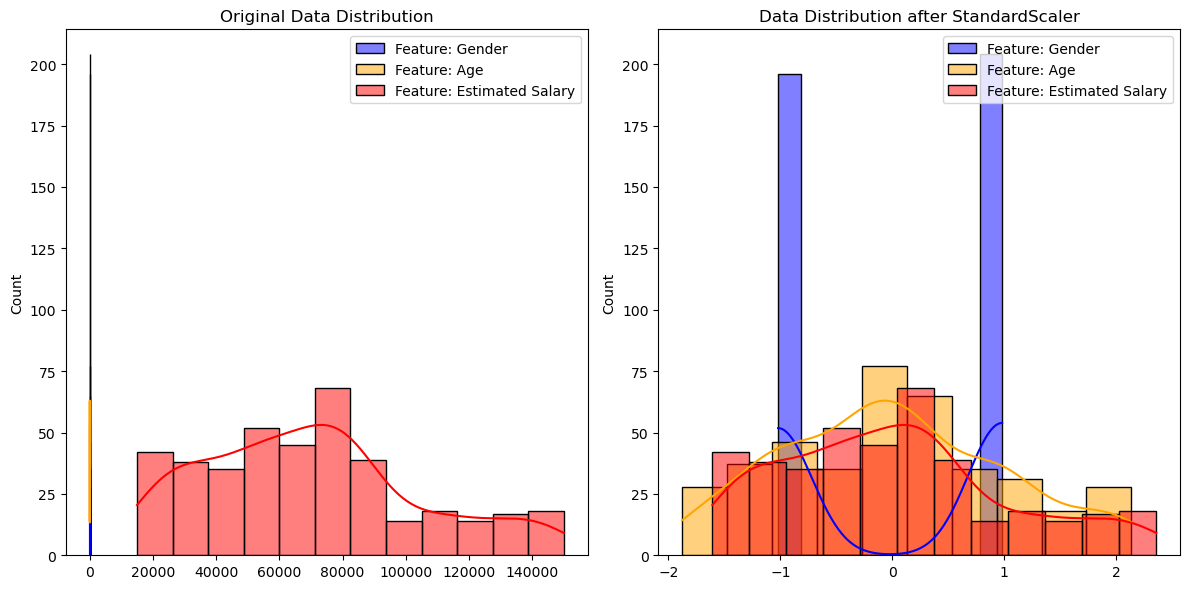

In [72]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(numpy_X[:, 0], kde=True, color='blue', label='Feature: Gender')
sns.histplot(numpy_X[:, 1], kde=True, color='orange', label='Feature: Age')
sns.histplot(numpy_X[:, 2], kde=True, color='red', label='Feature: Estimated Salary')
plt.title('Original Data Distribution')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(scaled_data[:, 0], kde=True, color='blue', label='Feature: Gender')
sns.histplot(scaled_data[:, 1], kde=True, color='orange', label='Feature: Age')
sns.histplot(scaled_data[:, 2], kde=True, color='red', label='Feature: Estimated Salary')
plt.title('Data Distribution after StandardScaler')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
X_train , X_test , y_train, Y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [49]:
print(len(X_train),len(y_train))

320 320


In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
y_pred = knn_model.predict(X_test)

In [52]:
print("Accuracy Score: ", accuracy_score(Y_test,y_pred))

Accuracy Score:  0.8125


In [53]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = np.mean(pred_i != Y_test)
    error_rate.append(error)
error_rate[:20]   

[0.1875,
 0.2375,
 0.2,
 0.2,
 0.175,
 0.225,
 0.1875,
 0.225,
 0.2,
 0.225,
 0.2,
 0.225,
 0.25,
 0.2375,
 0.225,
 0.25,
 0.225,
 0.2375,
 0.2375,
 0.25]

Text(0, 0.5, 'Error Rate')

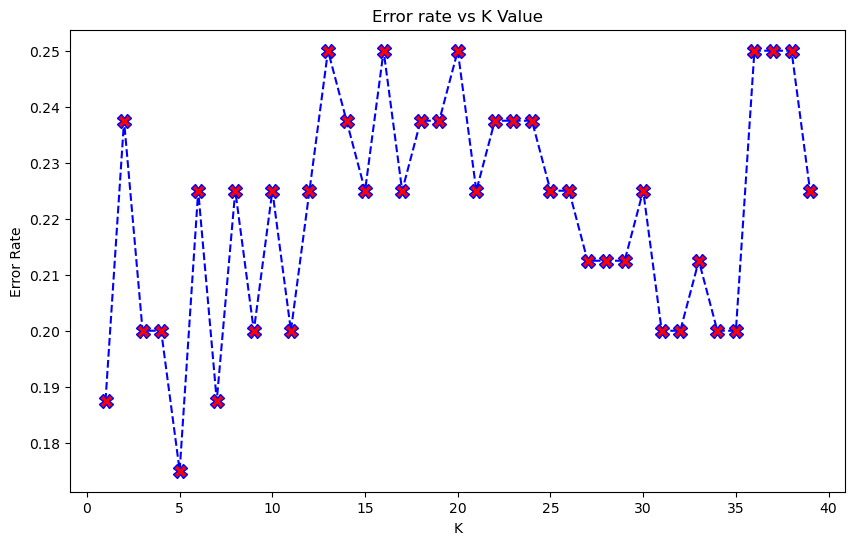

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'blue', linestyle = 'dashed', marker = "X", markerfacecolor = "red", markersize = 10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')